In [1]:
# !conda install -y absl-py
# !python3 -m pip install tensorflow
# !conda install -y Tensorboard
#!pip3 install 'h5py<3.0.0'
# !pip3 install tensorflow-gpu
# !pip3 install tensorflow-estimator==2.1.0
#!conda install -y tensorflow==2.0.0
#!conda install -y anaconda keras

In [2]:
#!pip install --ignore-installed --upgrade tensorflow==2.0
#!pip install opencv-python
#!pip install tensorflow-gpu==2.0.0


In [6]:
import os
import cv2
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import tensorflow as tf   
tf.get_logger().setLevel('ERROR')
print(tf.__version__)

mpl.rcParams['figure.figsize'] = (16, 14)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

2.6.2


In [7]:
## Iterate over data folders for classes name and train-test split !!

BASE_DATA_FOLD ='/media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223'
TESTING_FOLD = 'testing'
TRAINING_FOLD = 'training'

augmented = False

if augmented:
    TRAINING_FOLD = 'augmented_training'
    
validation_img = 'validation_images.npy'
validation_labl = 'validation_labels.npy'
if not augmented:
    training_img = 'training_images.npy'
    training_labl = 'training_labels.npy'
else:
    training_img = 'aug_training_images.npy'
    training_labl = 'aug_training_labels.npy'

CWD = os.getcwd()
SRC = os.path.join(CWD, BASE_DATA_FOLD)
TRAINING_DIR_PATH = os.path.join(CWD, TRAINING_FOLD)
TESTING_DIR_PATH = os.path.join(CWD, TESTING_FOLD)

CLASSES = sorted(os.listdir(SRC))
print(CLASSES)

SRC_DIR_PATHS = [os.path.join(SRC, Class) for Class in CLASSES]
TRAINING_CLASS_DIR_PATHS = [os.path.join(TRAINING_DIR_PATH, Class) for Class in CLASSES]
TESTING_CLASS_DIR_PATHS = [os.path.join(TESTING_DIR_PATH, Class) for Class in CLASSES]

['01_Bicycle', '02_TwoWheeler', '03_ThreeWheeler_Commercial', '04_ThreeWheeler_Passenger', '05_Tractor', '06_Tractor_with_Trailer', '07_Pickup', '08_TataAce', '09_Car', '10_Ecco', '11_Traveller', '12_LCV', '13_TwoAxle_Bus', '14_TwoAxle_Truck', '15_ThreeAxle_Bus', '16_ThreeAxle_Truck', '17_MAV_4to6Axle', '18_OSV_6to8Axle', '19_Cycle_Rickshaw', '20_EarthMovingEquipments']


In [8]:
cls2 = {key:item for key, item in enumerate(CLASSES)}
print(cls2)

{0: '01_Bicycle', 1: '02_TwoWheeler', 2: '03_ThreeWheeler_Commercial', 3: '04_ThreeWheeler_Passenger', 4: '05_Tractor', 5: '06_Tractor_with_Trailer', 6: '07_Pickup', 7: '08_TataAce', 8: '09_Car', 9: '10_Ecco', 10: '11_Traveller', 11: '12_LCV', 12: '13_TwoAxle_Bus', 13: '14_TwoAxle_Truck', 14: '15_ThreeAxle_Bus', 15: '16_ThreeAxle_Truck', 16: '17_MAV_4to6Axle', 17: '18_OSV_6to8Axle', 18: '19_Cycle_Rickshaw', 19: '20_EarthMovingEquipments'}


In [5]:
# CLASSES2=['00-Human Intervention','01-Bike','03-Car Hatchback','04-Car Sedan','05-Car SUV','06-Tractor','07-Jeep Scorpio Bolero','08-PickUp','09-Car Omni','11-Tata Ace','13-LCV 2 Axle Truck','14-LCV 2 Axle Bus','17-Truck 2 Axle  Big','22-Truck 2 Axle loading','23-Bus 2 Axle Big','26-MAV 3 Axle Truck','30-MAV 4 Axle','31-MAV 4 lifted axle','32-MAV 4 Axle trailer','33-MAV 5 Axle','34-MAV 5 lifted axle','35-MAV 5 Axle Trailer','36-MAV 5 AXLE trailer Lifted','37-MAV 6 Axle','38-MAV 6 Axle Lifted']
# CLASSES2.sort()
# print(CLASSES2)
# len(CLASSES2)


In [6]:
# len(CLASSES2)

In [9]:
import random
import shutil
from shutil import copyfile
## Create Training and Testing folders !!
for path in TRAINING_CLASS_DIR_PATHS:
    os.makedirs(path, exist_ok=True)
for path in TESTING_CLASS_DIR_PATHS:
    os.makedirs(path, exist_ok=True)

# Split data in train & test !!
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE=0.8):
    for fname in random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE))):
        if (fname.endswith('jpg') or fname.endswith('bmp') or fname.endswith('png') or fname.endswith('jpeg')):
            source = os.path.join(SOURCE, fname)
            if(os.path.getsize(source) != 0):
                if(len(os.listdir(TRAINING)) < len(os.listdir(SOURCE))*SPLIT_SIZE):
                    destination = os.path.join(TRAINING, fname)
                else:
                    destination = os.path.join(TESTING, fname)
                copyfile(source, destination)


for path in zip(SRC_DIR_PATHS, TRAINING_CLASS_DIR_PATHS, TESTING_CLASS_DIR_PATHS):
    print('Splitting Data from...', path[0])
    split_data(path[0], path[1], path[2])

Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/01_Bicycle
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/02_TwoWheeler
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/03_ThreeWheeler_Commercial
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/04_ThreeWheeler_Passenger
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/05_Tractor
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/06_Tractor_with_Trailer
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/07_Pickup
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/08_TataAce
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/09_Car
Splitting Data from... /media/vaaan/a5000_1/data_backup/ATCC/Final_ATCC_data_181223/10_Ecco
Splitting D

In [10]:
print('Training Data Img Count per Class:')
img_count = list()
for i, path in enumerate(TRAINING_CLASS_DIR_PATHS):
    count = len(os.listdir(path))
    img_count.append(count)
    print(i,':', path.split('/')[-1], ':', count)
    
print(f'Max:{max(img_count)} , Min:{min(img_count)}')
print('\nTotal Training images:', sum(img_count))
#
img_count.clear()
print('\nTesting Data Img Count per Class:')
for i, path in enumerate(TESTING_CLASS_DIR_PATHS):
    count = len(os.listdir(path))
    img_count.append(count)
    print(i,':', path.split('/')[-1], ':', count)
print('\nTotal Testing images:', sum(img_count))

Training Data Img Count per Class:
0 : 01_Bicycle : 2
1 : 02_TwoWheeler : 8234
2 : 03_ThreeWheeler_Commercial : 1184
3 : 04_ThreeWheeler_Passenger : 4587
4 : 05_Tractor : 8
5 : 06_Tractor_with_Trailer : 816
6 : 07_Pickup : 3068
7 : 08_TataAce : 4132
8 : 09_Car : 15749
9 : 10_Ecco : 1633
10 : 11_Traveller : 427
11 : 12_LCV : 5587
12 : 13_TwoAxle_Bus : 4611
13 : 14_TwoAxle_Truck : 2739
14 : 15_ThreeAxle_Bus : 0
15 : 16_ThreeAxle_Truck : 1244
16 : 17_MAV_4to6Axle : 2727
17 : 18_OSV_6to8Axle : 0
18 : 19_Cycle_Rickshaw : 16
19 : 20_EarthMovingEquipments : 73
Max:15749 , Min:0

Total Training images: 56837

Testing Data Img Count per Class:
0 : 01_Bicycle : 0
1 : 02_TwoWheeler : 2057
2 : 03_ThreeWheeler_Commercial : 295
3 : 04_ThreeWheeler_Passenger : 1145
4 : 05_Tractor : 0
5 : 06_Tractor_with_Trailer : 202
6 : 07_Pickup : 765
7 : 08_TataAce : 1031
8 : 09_Car : 3936
9 : 10_Ecco : 407
10 : 11_Traveller : 106
11 : 12_LCV : 1395
12 : 13_TwoAxle_Bus : 1151
13 : 14_TwoAxle_Truck : 683
14 : 15_Th

In [10]:
validation_img = 'validation_images.npy'
validation_labl = 'validation_labels.npy'
if not augmented:
    training_img = 'training_images.npy'
    training_labl = 'training_labels.npy'
else:
    training_img = 'aug_training_images.npy'
    training_labl = 'aug_training_labels.npy'

if not (os.path.exists(training_img) and os.path.exists(training_labl)
    and os.path.exists(validation_img) and os.path.exists(validation_labl)):
    
    training_images= list()
    training_labels= list()
    validation_images= list()
    validation_labels= list()

    if not(os.path.exists(training_img) and os.path.exists(training_labl)): 
        IMAGES = [os.path.join(fold, image) for fold in TRAINING_CLASS_DIR_PATHS for image in os.listdir(fold)]
        print('Loading Training Data ....')
        print(len(IMAGES))
        for img in IMAGES:
            im = plt.imread(img)
            training_images.append(cv2.resize(im, (224, 224)))
            training_labels.append(CLASSES.index(img.split('/')[-2]))
        print('Training_images_size:', len(training_images))
        print('Training_labels_size:', len(training_labels))
        print('\nSaving Training Data and Labels in np format...')
        training_images = np.array(training_images)
        np.save(training_img, training_images)
        training_labels = np.array(training_labels)
        np.save(training_labl, training_labels)
        IMAGES.clear()
        print('Saving Done !!')
    else:
        print('\nLoading Training data from numpy files...')
        training_images = np.load(training_img)
        training_labels = np.load(training_labl)
        print('Loading Done !!')

    
    if not(os.path.exists(validation_img) and os.path.exists(validation_labl)):
        IMAGES = [os.path.join(fold, image) for fold in TESTING_CLASS_DIR_PATHS for image in os.listdir(fold)]
        print('\nLoading Validation Data ....')
        print(len(IMAGES))
        for img in IMAGES:
            im = plt.imread(img)
            validation_images.append(cv2.resize(im, (224, 224)))
            validation_labels.append(CLASSES.index(img.split('/')[-2]))
        print('Validation_images_size:', len(validation_images))
        print('Validation_labels_size:', len(validation_labels))

        print('Saving Validation Data and Labels in np format...')
        validation_images = np.array(validation_images)
        np.save(validation_img, validation_images)
        validation_labels = np.array(validation_labels)
        np.save(validation_labl, validation_labels)
        IMAGES.clear()
        print('Saving Done !!')
    else:
        print('\nLoading Validation data from numpy files...')
        validation_images = np.load(validation_img)
        validation_labels = np.load(validation_labl)
        print('Loading Done !!')        

else:
    print('Loading data from numpy files...')
    training_images = np.load(training_img)
    training_labels = np.load(training_labl)
    validation_images = np.load(validation_img)
    validation_labels = np.load(validation_labl)
    print('Loading Done !!')

Loading data from numpy files...
Loading Done !!


In [11]:
CLASSES2=[item.split('/')[-1] for item in TESTING_CLASS_DIR_PATHS if len(os.listdir(item)) > 0]
CLASSES2.sort()
print(CLASSES2)
len(CLASSES2)

['01_Bicycle', '02_TwoWheeler', '03_ThreeWheeler_Commercial', '04_ThreeWheeler_Passenger', '05_Tractor', '06_Tractor_with_Trailer', '07_Pickup', '08_TataAce', '09_Car', '10_Ecco', '11_Traveller', '12_LCV', '13_TwoAxle_Bus', '14_TwoAxle_Truck', '16_ThreeAxle_Truck', '17_MAV_4to6Axle', '19_Cycle_Rickshaw', '20_EarthMovingEquipments']


18

In [12]:
METRICS = [
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'), 
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Define a Callback class that stops training once accuracy reaches 99.9%
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

# def preprocess(inputs):
#     imgs = inputs.astype('float32')
#     processed_input = tf.keras.applications.resnet_v2.preprocess_input(imgs)
#     return processed_input

In [13]:
def plot_metrics(history):
    metrics = ['accuracy', 'loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(3,3,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend();

In [14]:
training_images = np.load(training_img)
training_labels = np.load(training_labl)
validation_images = np.load(validation_img)
validation_labels = np.load(validation_labl)

In [18]:
print('\nProcessing Images ...')
train_X = training_images
valid_X = validation_images

training_labels = tf.keras.utils.to_categorical(training_labels,50)
validation_labels = tf.keras.utils.to_categorical(validation_labels,50)
print('Processing Done !')

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.3),  # Increase rotation
    layers.RandomZoom(0.3),  # Increase zoom range
    layers.Lambda(lambda x: tf.image.random_brightness(x, max_delta=0.4)),  # Adjust brightness
    layers.RandomContrast(0.4),  # Increase contrast range
    layers.RandomTranslation(0.2, 0.2),  # Add translation
])


Processing Images ...
Processing Done !


In [19]:
pre_trained_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top = False, weights = 'imagenet')
processed_input = tf.keras.applications.resnet_v2.preprocess_input
for layer in pre_trained_model.layers[:29]:    #Freeze weights of eight five layers 29
    layer.trainable = False

pre_trained_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
#pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [20]:
inputs = tf.keras.Input(shape=(224,224,3))
# Apply augmentation before ResNet50 preprocessing
x = data_augmentation(inputs)

x = processed_input(x)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(50, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_model")
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=METRICS)

# Print the model summary
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0  

In [ ]:
# # Create ImageDataGenerator objects
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.2, brightness_range=[0.2,0.8], preprocessing_function=preprocess)
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [24]:
# train_data_generator = train_datagen.flow_from_directory(
#     TRAINING_DIR_PATH,
#     target_size=(224,224),
#     class_mode='categorical'
# )

# test_data_generator = train_datagen.flow_from_directory(
#     TESTING_DIR_PATH,
#     target_size=(224,224),
#     class_mode='categorical',
#     shuffle=False
# )

BATCH_SIZE = 32
#tf.debugging.set_log_device_placement(True)
#with tf.device('/GPU:0'):
history = model.fit(train_X, training_labels, epochs=30, validation_data = (valid_X, validation_labels), batch_size=BATCH_SIZE, callbacks=[early_stopping], workers=32)
    #history = model.fit(train_data_generator, validation_data=test_data_generator, batch_size=BATCH_SIZE, epochs=25, callbacks=[early_stopping],workers=32)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
plot_metrics(history)

In [ ]:
# validation_images = np.load(validation_img)
# validation_labels = np.load(validation_labl)

# # valid_X = preprocess(validation_images)
# valid_X = validation_images/255.
# validation_labels = tf.keras.utils.to_categorical(validation_labels,50)

In [ ]:


# validation_index = validation_labels
# predictions_index = tf.argmax(test_predictions, axis=1)

In [ ]:
# test_data_generator.reset()
# results = model.evaluate_generator(generator=test_data_generator, workers = 1)
# predictions = model.predict_generator(generator=test_data_generator, workers = 1)
# predictions_index = np.argmax(predictions, axis=1)
# # test_data_generator.reset()
# validation_index = test_data_generator.classes#[test_data_generator.index_array]

In [ ]:
results = model.evaluate(valid_X, validation_labels)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()
test_predictions = model.predict(x=valid_X)
validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

# print('f1_score:',f1_score(validation_labels, test_predictions))

444/444 [==============================] - 16s 36ms/step - loss: 0.1506 - tp: 13439.0000 - fp: 493.0000 - tn: 694474.0000 - fn: 744.0000 - accuracy: 0.9547 - precision: 0.9646 - recall: 0.9475 - auc: 0.9978 - prc: 0.9871
loss :  0.15062345564365387
tp :  13439.0
fp :  493.0
tn :  694474.0
fn :  744.0
accuracy :  0.9547345638275146
precision :  0.9646138548851013
recall :  0.9475428462028503
auc :  0.9977510571479797
prc :  0.9870548844337463



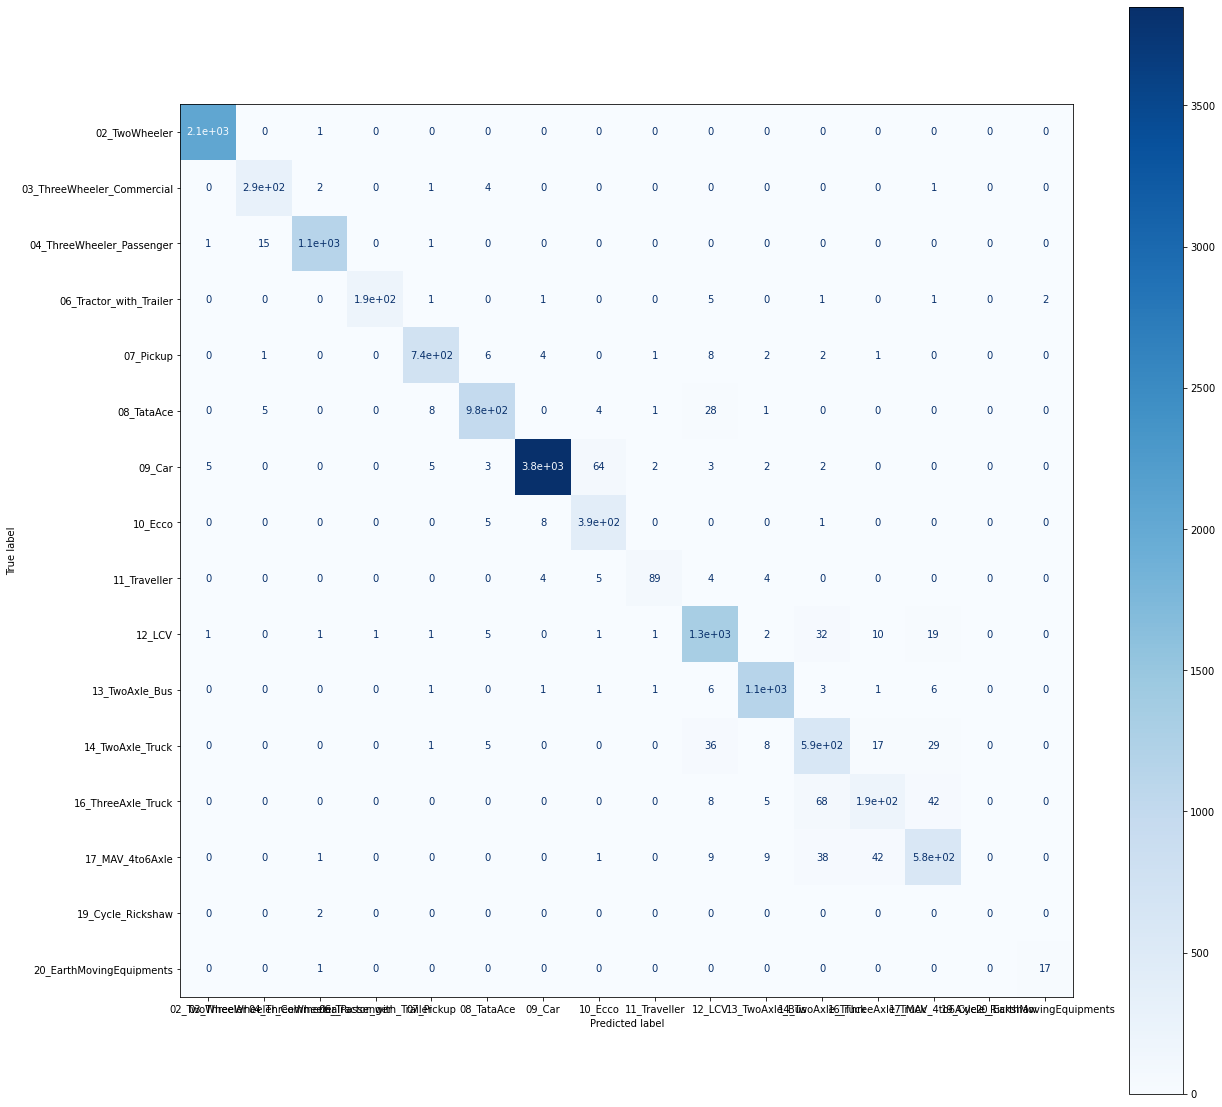

In [ ]:
results = model.evaluate(valid_X, validation_labels)
for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()
test_predictions = model.predict(x=valid_X)
validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

# print('f1_score:',f1_score(validation_labels, test_predictions))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
## Plot Confusion matrix !! 
plt.rcParams['figure.figsize'] = [20, 20]
cm = confusion_matrix(validation_index, predictions_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES2)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
## Model fine tuning !!
pre_trained_model.trainable = True
for layer in pre_trained_model.layers[:18]:    #Freeze weights of eight five layers
    layer.trainable = False

#pre_trained_model.summary()
# model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=METRICS,
)
#with tf.device('/GPU:0'):
history = model.fit(train_X, training_labels, epochs=15, validation_data = (valid_X, validation_labels), batch_size=BATCH_SIZE, callbacks=[early_stopping], workers=32)
    #history = model.fit(train_data_generator, validation_data=test_data_generator, batch_size=32, epochs=15, callbacks=[early_stopping], workers=32)

Epoch 1/15
1777/1777 [==============================] - 174s 96ms/step - loss: 0.0868 - tp: 68352.0000 - fp: 1693.0000 - tn: 3478287.0000 - fn: 2668.0000 - accuracy: 0.9687 - precision: 0.9758 - recall: 0.9624 - auc: 0.9991 - prc: 0.9938 - val_loss: 0.1292 - val_tp: 13582.0000 - val_fp: 445.0000 - val_tn: 694522.0000 - val_fn: 601.0000 - val_accuracy: 0.9618 - val_precision: 0.9683 - val_recall: 0.9576 - val_auc: 0.9976 - val_prc: 0.9886
Epoch 2/15
1777/1777 [==============================] - 167s 94ms/step - loss: 0.0724 - tp: 55220.0000 - fp: 1074.0000 - tn: 2783939.0000 - fn: 1617.0000 - accuracy: 0.9758 - precision: 0.9809 - recall: 0.9716 - auc: 0.9995 - prc: 0.9964 - val_loss: 0.1263 - val_tp: 13610.0000 - val_fp: 421.0000 - val_tn: 694546.0000 - val_fn: 573.0000 - val_accuracy: 0.9643 - val_precision: 0.9700 - val_recall: 0.9596 - val_auc: 0.9975 - val_prc: 0.9884
Epoch 3/15
1777/1777 [==============================] - 167s 94ms/step - loss: 0.0650 - tp: 55391.0000 - fp: 958.000

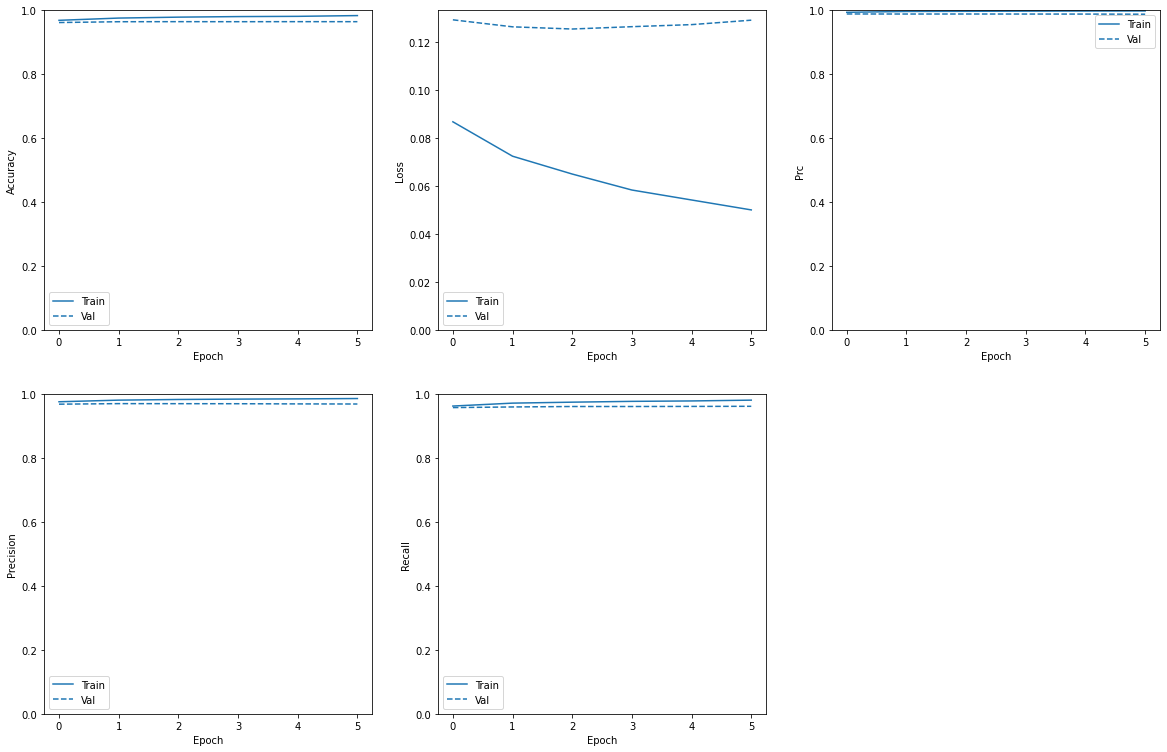

In [ ]:
plot_metrics(history)

In [ ]:
# test_data_generator.reset()
# predictions = model.predict_generator(generator=test_data_generator,
#                                     steps=test_data_generator.samples//32,
#                                     max_queue_size=10,
#                                     workers=0,
#                                     use_multiprocessing=False,
#                                     verbose=0)
# predictions_index = np.argmax(predictions, axis=1)
# validation_index = test_data_generator.classes[test_data_generator.index_array]

loss :  0.12923696637153625
tp :  13582.0
fp :  445.0
tn :  694522.0
fn :  601.0
accuracy :  0.9617852568626404
precision :  0.9682754874229431
recall :  0.9576253294944763
auc :  0.9975671172142029
prc :  0.9886000156402588



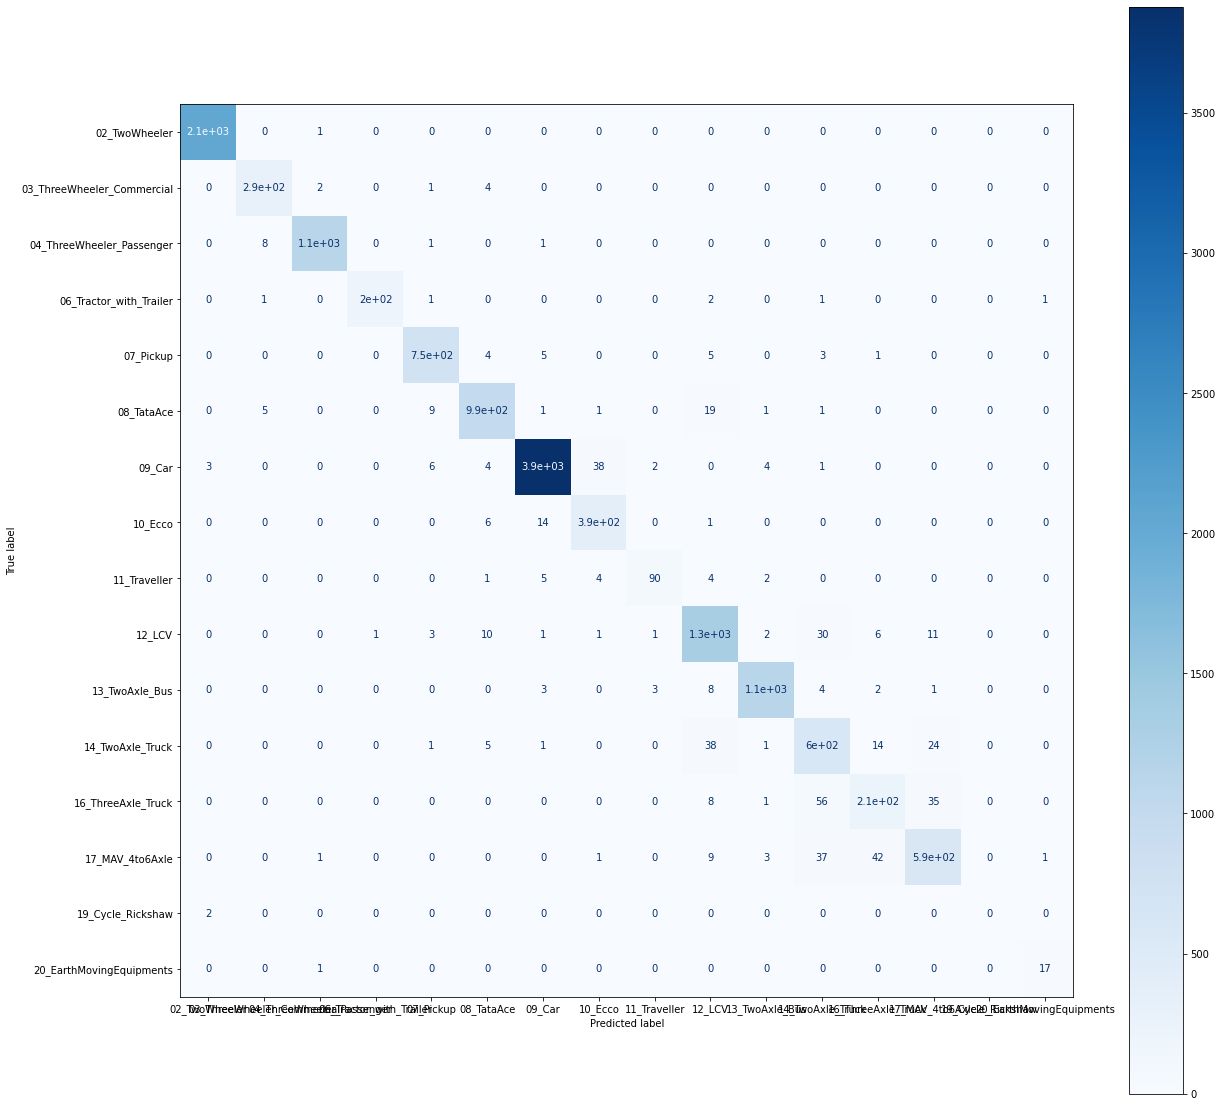

In [ ]:
results = model.evaluate(valid_X, validation_labels, verbose=0,workers=0)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print()

test_predictions = model.predict(x=valid_X)

validation_index = tf.argmax(validation_labels, axis=1)
predictions_index = tf.argmax(test_predictions, axis=1)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
## Plot Confusion matrix !! 
plt.rcParams['figure.figsize'] = [20, 20]
cm = confusion_matrix(validation_index, predictions_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES2)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#tf.keras.models.save_model(model, './savedModel/resnet50V2_fineTuned_ANPR_KDMC_211022.h5', save_format='h5')
#model.save('./C-AVC_model_220922/')
print("Model Saved !!")

### Training Done !!!